In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
import joblib
import seaborn as sns
import networkx as nx


In [2]:
# the use of Git LFS for the data

X_Behav_Novel_Object = pd.pandas.read_csv("../data/etho/Behav_Novel_Object.csv")
X_Behav_Novel_Object = pd.DataFrame(X_Behav_Novel_Object).drop(['Frames'], axis=1)
X_Behav_Novel_Object = X_Behav_Novel_Object.values 


X_Behav_Unrelated_to_Object = pd.pandas.read_csv("../data/etho/Behav_Unrelated_to_Object.csv")
X_Distances = pd.pandas.read_csv("../data/etho/Distances.csv")
X_Ear_position = pd.pandas.read_csv("../data/etho/Ear_position.csv")
X_Other_behaviors = pd.pandas.read_csv("../data/etho/Other_behaviors.csv")
X_rumination = pd.pandas.read_csv("../data/etho/Rumination.csv")

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [3]:
best_score = -float('inf')
best_model = None
best_n_components = 0

for n_components in range(2, 6):
    model = hmm.CategoricalHMM(n_components=n_components, random_state=42, n_iter=100)
    model.fit(X_Behav_Novel_Object)
    score = model.score(X_Behav_Novel_Object)
    if score > best_score:
        best_score = score
        best_model = model
        best_n_components = n_components

In [ ]:
Z = model.predict(X_Behav_Novel_Object)
states = pd.unique(Z)

plt.subplot(2,2,1)
for i in states:
    x = np.linspace(1,len(X_Behav_Novel_Object[0]),len(X_Behav_Novel_Object[0]))[(Z == i)]
    y = X_Behav_Novel_Object[0][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("")
    
plt.subplot(2,2,2)
for i in states:
    x = np.linspace(1,len(X_Behav_Novel_Object[1]),len(X_Behav_Novel_Object[1]))[(Z == i)]
    y = X_Behav_Novel_Object[1][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("")

plt.subplot(2,2,3)
for i in states:
    x = np.linspace(1,len(X_Behav_Novel_Object[2]),len(X_Behav_Novel_Object[2]))[(Z == i)]
    y = X_Behav_Novel_Object[2][(Z == i)]
    plt.plot(x, y, '.')
    plt.title("")


plt.tight_layout()
plt.suptitle('')

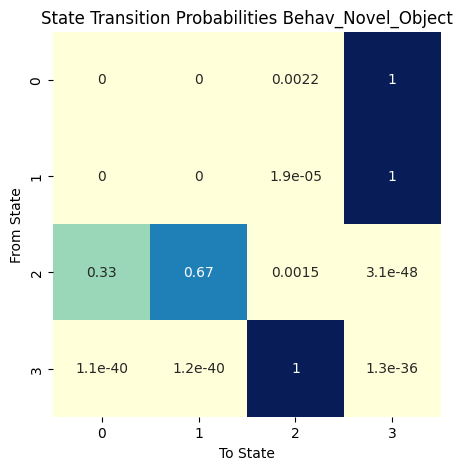

In [9]:
transition_matrix = best_model.transmat_
plt.figure(figsize=(5, 5))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities Behav_Novel_Object')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()